# Multiobjective optimization with Pareto front mapping

One way to do multiobjective optimization is with Pareto optimization, which explores the set of Pareto-efficient points. A point is Pareto-efficient if there are no other valid points that are better at every objective: it shows the "trade-off" between several objectives. 

In [1]:
import datetime

from bluesky.callbacks import best_effort
from bluesky.callbacks.tiled_writer import TiledWriter
from bluesky.run_engine import RunEngine
from ophyd.utils import make_dir_tree  # Constants
from tiled.client import from_uri
from tiled.server import SimpleTiledServer

DEFAULT_ROOT_DIR = "/tmp/sirepo-bluesky-data"

tiled_server = SimpleTiledServer()
tiled_client = from_uri(tiled_server.uri)
tiled_writer = TiledWriter(tiled_client)


def setup_re_env(db_type="default", root_dir="/default/path"):
    RE = RunEngine({})
    bec = best_effort.BestEffortCallback()
    RE.subscribe(bec)
    RE.subscribe(tiled_writer)
    _ = make_dir_tree(datetime.datetime.now().year, base_path=root_dir)
    return {'RE': RE, 'tiled': tiled_client, 'bec': bec}


env = setup_re_env(db_type="temp", root_dir=DEFAULT_ROOT_DIR)
globals().update(env)

/home/jmoylan1/Documents/Github/blop/.pixi/envs/default/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(
Tiled version 0.1.0b22


2025-05-19 16:00:08.369 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


In [ ]:
import numpy as np

from blop import DOF, Agent, Objective


def digestion(df):
    for index, entry in df.iterrows():
        x1, x2 = entry.x1, entry.x2

        df.loc[index, "f1"] = (x1 - 2) ** 2 + (x2 - 1) + 2
        df.loc[index, "f2"] = 9 * x1 - (x2 - 1) + 2
        df.loc[index, "c1"] = x1**2 + x2**2
        df.loc[index, "c2"] = x1 - 3 * x2 + 10

    return df


dofs = [
    DOF(name="x1", search_domain=(-20, 20)),
    DOF(name="x2", search_domain=(-20, 20)),
]


objectives = [
    Objective(name="f1", target="min"),
    Objective(name="f2", target="min"),
    Objective(name="c1", constraint=(-np.inf, 225)),
    Objective(name="c2", constraint=(-np.inf, 0)),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=digestion,
    tiled=tiled,
)

(uid,) = RE(agent.learn("qr", n=64))

/home/jmoylan1/Documents/Github/blop/.pixi/envs/default/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


('self', 'dofs', 'objectives', 'tiled', 'detectors', 'acquisition_plan', 'digestion', 'digestion_kwargs', 'verbose', 'enforce_all_objectives_valid', 'exclude_pruned', 'model_inactive_objectives', 'tolerate_acquisition_errors', 'sample_center_on_init', 'trigger_delay', 'train_every')


2025-05-19 16:00:06.386 INFO: Executing plan <generator object Agent.learn at 0x7576522efd30>
2025-05-19 16:00:06.387 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x75768c913090> from 'idle' -> 'running'




Transient Scan ID: 1     Time: 2025-05-19 16:00:06
Persistent Unique Scan ID: '2f2de00f-9d80-40fe-9c3f-7f972de3af71'


2025-05-19 16:00:06.449 INFO: HTTP Request: POST http://127.0.0.1:38783/api/v1/metadata/ "HTTP/1.1 200 OK"


New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+


2025-05-19 16:00:06.460 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search//2f2de00f-9d80-40fe-9c3f-7f972de3af71?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.469 INFO: HTTP Request: POST http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71 "HTTP/1.1 200 OK"
2025-05-19 16:00:06.477 INFO: HTTP Request: POST http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary "HTTP/1.1 200 OK"
2025-05-19 16:00:06.485 INFO: HTTP Request: POST http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary "HTTP/1.1 200 OK"
2025-05-19 16:00:06.492 INFO: HTTP Request: POST http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary "HTTP/1.1 200 OK"
2025-05-19 16:00:06.503 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary "HTTP/1.1 200 OK"
2025-05-19 16:00:06.510 INFO: HTTP Request: GET http://127.0.0.1:38783/ap

|         1 | 16:00:06.5 |     -3.786 |      1.957 |


2025-05-19 16:00:06.585 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.591 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.602 INFO: HTTP Request: POST http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.609 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.615 INFO: HTTP Request: PUT http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|         2 | 16:00:06.6 |     -5.338 |     -1.979 |


2025-05-19 16:00:06.623 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.628 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.634 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.641 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|         3 | 16:00:06.6 |     -3.367 |     -5.385 |


2025-05-19 16:00:06.647 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.652 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.658 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.665 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|         4 | 16:00:06.6 |     -2.482 |     -3.433 |


2025-05-19 16:00:06.672 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.677 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.683 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.690 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|         5 | 16:00:06.6 |      1.397 |     -2.918 |


2025-05-19 16:00:06.697 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.702 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.708 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.715 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|         6 | 16:00:06.7 |      2.909 |     -5.803 |


2025-05-19 16:00:06.722 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.728 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.733 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.740 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|         7 | 16:00:06.7 |      6.951 |    -11.983 |


2025-05-19 16:00:06.747 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.753 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.759 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.766 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|         8 | 16:00:06.7 |      4.354 |    -15.379 |


2025-05-19 16:00:06.772 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.778 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.783 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.790 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|         9 | 16:00:06.7 |      8.452 |    -19.257 |


2025-05-19 16:00:06.797 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.803 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.809 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.816 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        10 | 16:00:06.8 |     12.804 |    -17.725 |


2025-05-19 16:00:06.822 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.828 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.833 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.840 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        11 | 16:00:06.8 |     19.410 |    -16.272 |


2025-05-19 16:00:06.847 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.853 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.858 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.865 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        12 | 16:00:06.8 |     15.989 |    -14.950 |


2025-05-19 16:00:06.872 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.877 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.883 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.890 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        13 | 16:00:06.8 |     11.816 |    -11.094 |


2025-05-19 16:00:06.896 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.902 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.908 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.915 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        14 | 16:00:06.9 |      9.896 |     -9.444 |


2025-05-19 16:00:06.922 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.927 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.933 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.940 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        15 | 16:00:06.9 |     13.859 |     -8.476 |


2025-05-19 16:00:06.947 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.952 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.958 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.964 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        16 | 16:00:06.9 |     18.355 |     -7.411 |


2025-05-19 16:00:06.971 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:06.976 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:06.982 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:06.989 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        17 | 16:00:06.9 |     17.356 |     -3.889 |


2025-05-19 16:00:06.995 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.001 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.007 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.014 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        18 | 16:00:07.0 |     18.876 |      0.253 |


2025-05-19 16:00:07.021 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.027 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.032 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.040 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        19 | 16:00:07.0 |     13.284 |      3.875 |


2025-05-19 16:00:07.046 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.052 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.057 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.064 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        20 | 16:00:07.0 |     10.449 |     -0.265 |


2025-05-19 16:00:07.070 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.076 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.081 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.088 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        21 | 16:00:07.0 |      5.817 |     -1.875 |


2025-05-19 16:00:07.095 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.100 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.106 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.112 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        22 | 16:00:07.1 |      4.870 |      1.846 |


2025-05-19 16:00:07.119 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.124 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.130 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.137 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        23 | 16:00:07.1 |      7.949 |      2.892 |


2025-05-19 16:00:07.144 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.150 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.156 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.163 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        24 | 16:00:07.1 |      6.336 |      5.789 |


2025-05-19 16:00:07.169 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.175 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.181 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.188 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        25 | 16:00:07.1 |     12.408 |      7.385 |


2025-05-19 16:00:07.194 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.200 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.206 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.213 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        26 | 16:00:07.2 |     15.412 |      8.447 |


2025-05-19 16:00:07.220 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.226 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.231 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.239 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        27 | 16:00:07.2 |     17.744 |     11.065 |


2025-05-19 16:00:07.246 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.251 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.257 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.264 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        28 | 16:00:07.2 |     16.857 |     17.714 |


2025-05-19 16:00:07.271 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.277 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.283 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.290 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        29 | 16:00:07.2 |     14.417 |     14.923 |


2025-05-19 16:00:07.297 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.302 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.308 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.314 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        30 | 16:00:07.3 |     10.962 |     16.258 |


2025-05-19 16:00:07.321 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.327 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.332 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.339 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        31 | 16:00:07.3 |      9.317 |     13.406 |


2025-05-19 16:00:07.345 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.350 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.356 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.363 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        32 | 16:00:07.3 |      5.282 |     15.353 |


2025-05-19 16:00:07.369 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.375 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.381 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.388 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        33 | 16:00:07.3 |      3.503 |     11.972 |


2025-05-19 16:00:07.395 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.400 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.406 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.413 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        34 | 16:00:07.4 |      0.825 |      9.432 |


2025-05-19 16:00:07.420 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.426 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.433 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.439 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        35 | 16:00:07.4 |     -0.366 |      9.226 |


2025-05-19 16:00:07.446 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.451 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.457 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.464 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        36 | 16:00:07.4 |     -2.731 |     11.843 |


2025-05-19 16:00:07.470 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.476 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.482 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.488 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        37 | 16:00:07.4 |      1.879 |     19.229 |


2025-05-19 16:00:07.495 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.500 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.506 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.513 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        38 | 16:00:07.5 |     -1.733 |     19.417 |


2025-05-19 16:00:07.519 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.525 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.530 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.537 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        39 | 16:00:07.5 |     -6.072 |     15.796 |


2025-05-19 16:00:07.543 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.549 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.555 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.563 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        40 | 16:00:07.5 |    -10.191 |     17.399 |


2025-05-19 16:00:07.570 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.575 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.580 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.587 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        41 | 16:00:07.5 |     -9.483 |     12.906 |


2025-05-19 16:00:07.594 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.599 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.605 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.611 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        42 | 16:00:07.6 |    -14.271 |     13.882 |


2025-05-19 16:00:07.618 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.623 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.629 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.636 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        43 | 16:00:07.6 |    -17.024 |     18.444 |


2025-05-19 16:00:07.643 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.648 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.654 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.661 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        44 | 16:00:07.6 |    -18.535 |     10.238 |


2025-05-19 16:00:07.668 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.673 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.679 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.686 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        45 | 16:00:07.6 |    -15.890 |      7.698 |


2025-05-19 16:00:07.693 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.698 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.704 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.711 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        46 | 16:00:07.7 |    -12.826 |      4.937 |


2025-05-19 16:00:07.718 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.724 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.729 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.737 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        47 | 16:00:07.7 |    -11.324 |      6.264 |


2025-05-19 16:00:07.743 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.749 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.754 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.761 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        48 | 16:00:07.7 |     -7.439 |      5.367 |


2025-05-19 16:00:07.768 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.774 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.780 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.786 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        49 | 16:00:07.7 |     -8.428 |      3.413 |


2025-05-19 16:00:07.793 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.799 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.804 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.811 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|        50 | 16:00:07.8 |    -10.908 |     -1.077 |


2025-05-19 16:00:07.819 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.824 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.830 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.836 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        51 | 16:00:07.8 |    -19.979 |      1.062 |


2025-05-19 16:00:07.843 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.849 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.855 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.862 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        52 | 16:00:07.8 |    -16.253 |     -4.955 |


2025-05-19 16:00:07.868 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.874 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.879 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.886 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        53 | 16:00:07.8 |    -17.876 |     -6.285 |


2025-05-19 16:00:07.893 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.899 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.904 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.911 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        54 | 16:00:07.9 |    -14.944 |     -7.721 |


2025-05-19 16:00:07.918 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.924 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.930 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.937 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        55 | 16:00:07.9 |    -11.962 |    -10.260 |


2025-05-19 16:00:07.944 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.949 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.955 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.962 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        56 | 16:00:07.9 |     -8.793 |     -9.241 |


2025-05-19 16:00:07.969 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.975 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:07.980 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:07.987 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        57 | 16:00:07.9 |     -6.784 |    -11.858 |


2025-05-19 16:00:07.993 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:07.999 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:08.005 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:08.012 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        58 | 16:00:08.0 |     -1.036 |    -12.924 |


2025-05-19 16:00:08.019 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:08.024 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:08.030 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:08.038 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        59 | 16:00:08.0 |      0.264 |    -13.420 |


2025-05-19 16:00:08.044 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:08.050 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:08.056 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:08.063 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        60 | 16:00:08.0 |     -4.500 |    -15.816 |


2025-05-19 16:00:08.070 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:08.075 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:08.081 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:08.088 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        61 | 16:00:08.0 |     -7.661 |    -19.440 |


2025-05-19 16:00:08.095 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:08.101 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:08.106 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:08.114 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        62 | 16:00:08.1 |    -13.576 |    -18.459 |


2025-05-19 16:00:08.120 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:08.126 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:08.132 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:08.139 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        63 | 16:00:08.1 |    -15.199 |    -13.901 |


2025-05-19 16:00:08.145 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:08.151 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:08.157 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:08.164 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


|        64 | 16:00:08.1 |    -19.244 |    -17.416 |


2025-05-19 16:00:08.170 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal "HTTP/1.1 200 OK"
2025-05-19 16:00:08.176 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/search/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal?page%5Boffset%5D=0&fields=&sort= "HTTP/1.1 200 OK"
2025-05-19 16:00:08.181 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:08.188 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/table/partition/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events?partition=0 "HTTP/1.1 200 OK"


+-----------+------------+------------+------------+
generator list_scan ['2f2de00f'] (scan num: 1)





2025-05-19 16:00:08.301 INFO: HTTP Request: PATCH http://127.0.0.1:38783/api/v1/metadata//2f2de00f-9d80-40fe-9c3f-7f972de3af71 "HTTP/1.1 200 OK"
2025-05-19 16:00:08.307 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71 "HTTP/1.1 200 OK"
2025-05-19 16:00:08.313 INFO: HTTP Request: GET http://127.0.0.1:38783/api/v1/metadata/2f2de00f-9d80-40fe-9c3f-7f972de3af71/primary/internal/events "HTTP/1.1 200 OK"
2025-05-19 16:00:08.797 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x75768c913090> from 'running' -> 'idle'
2025-05-19 16:00:08.798 INFO: Cleaned up from plan <generator object Agent.learn at 0x7576522efd30>


We can plot our fitness and constraint objectives to see their models:

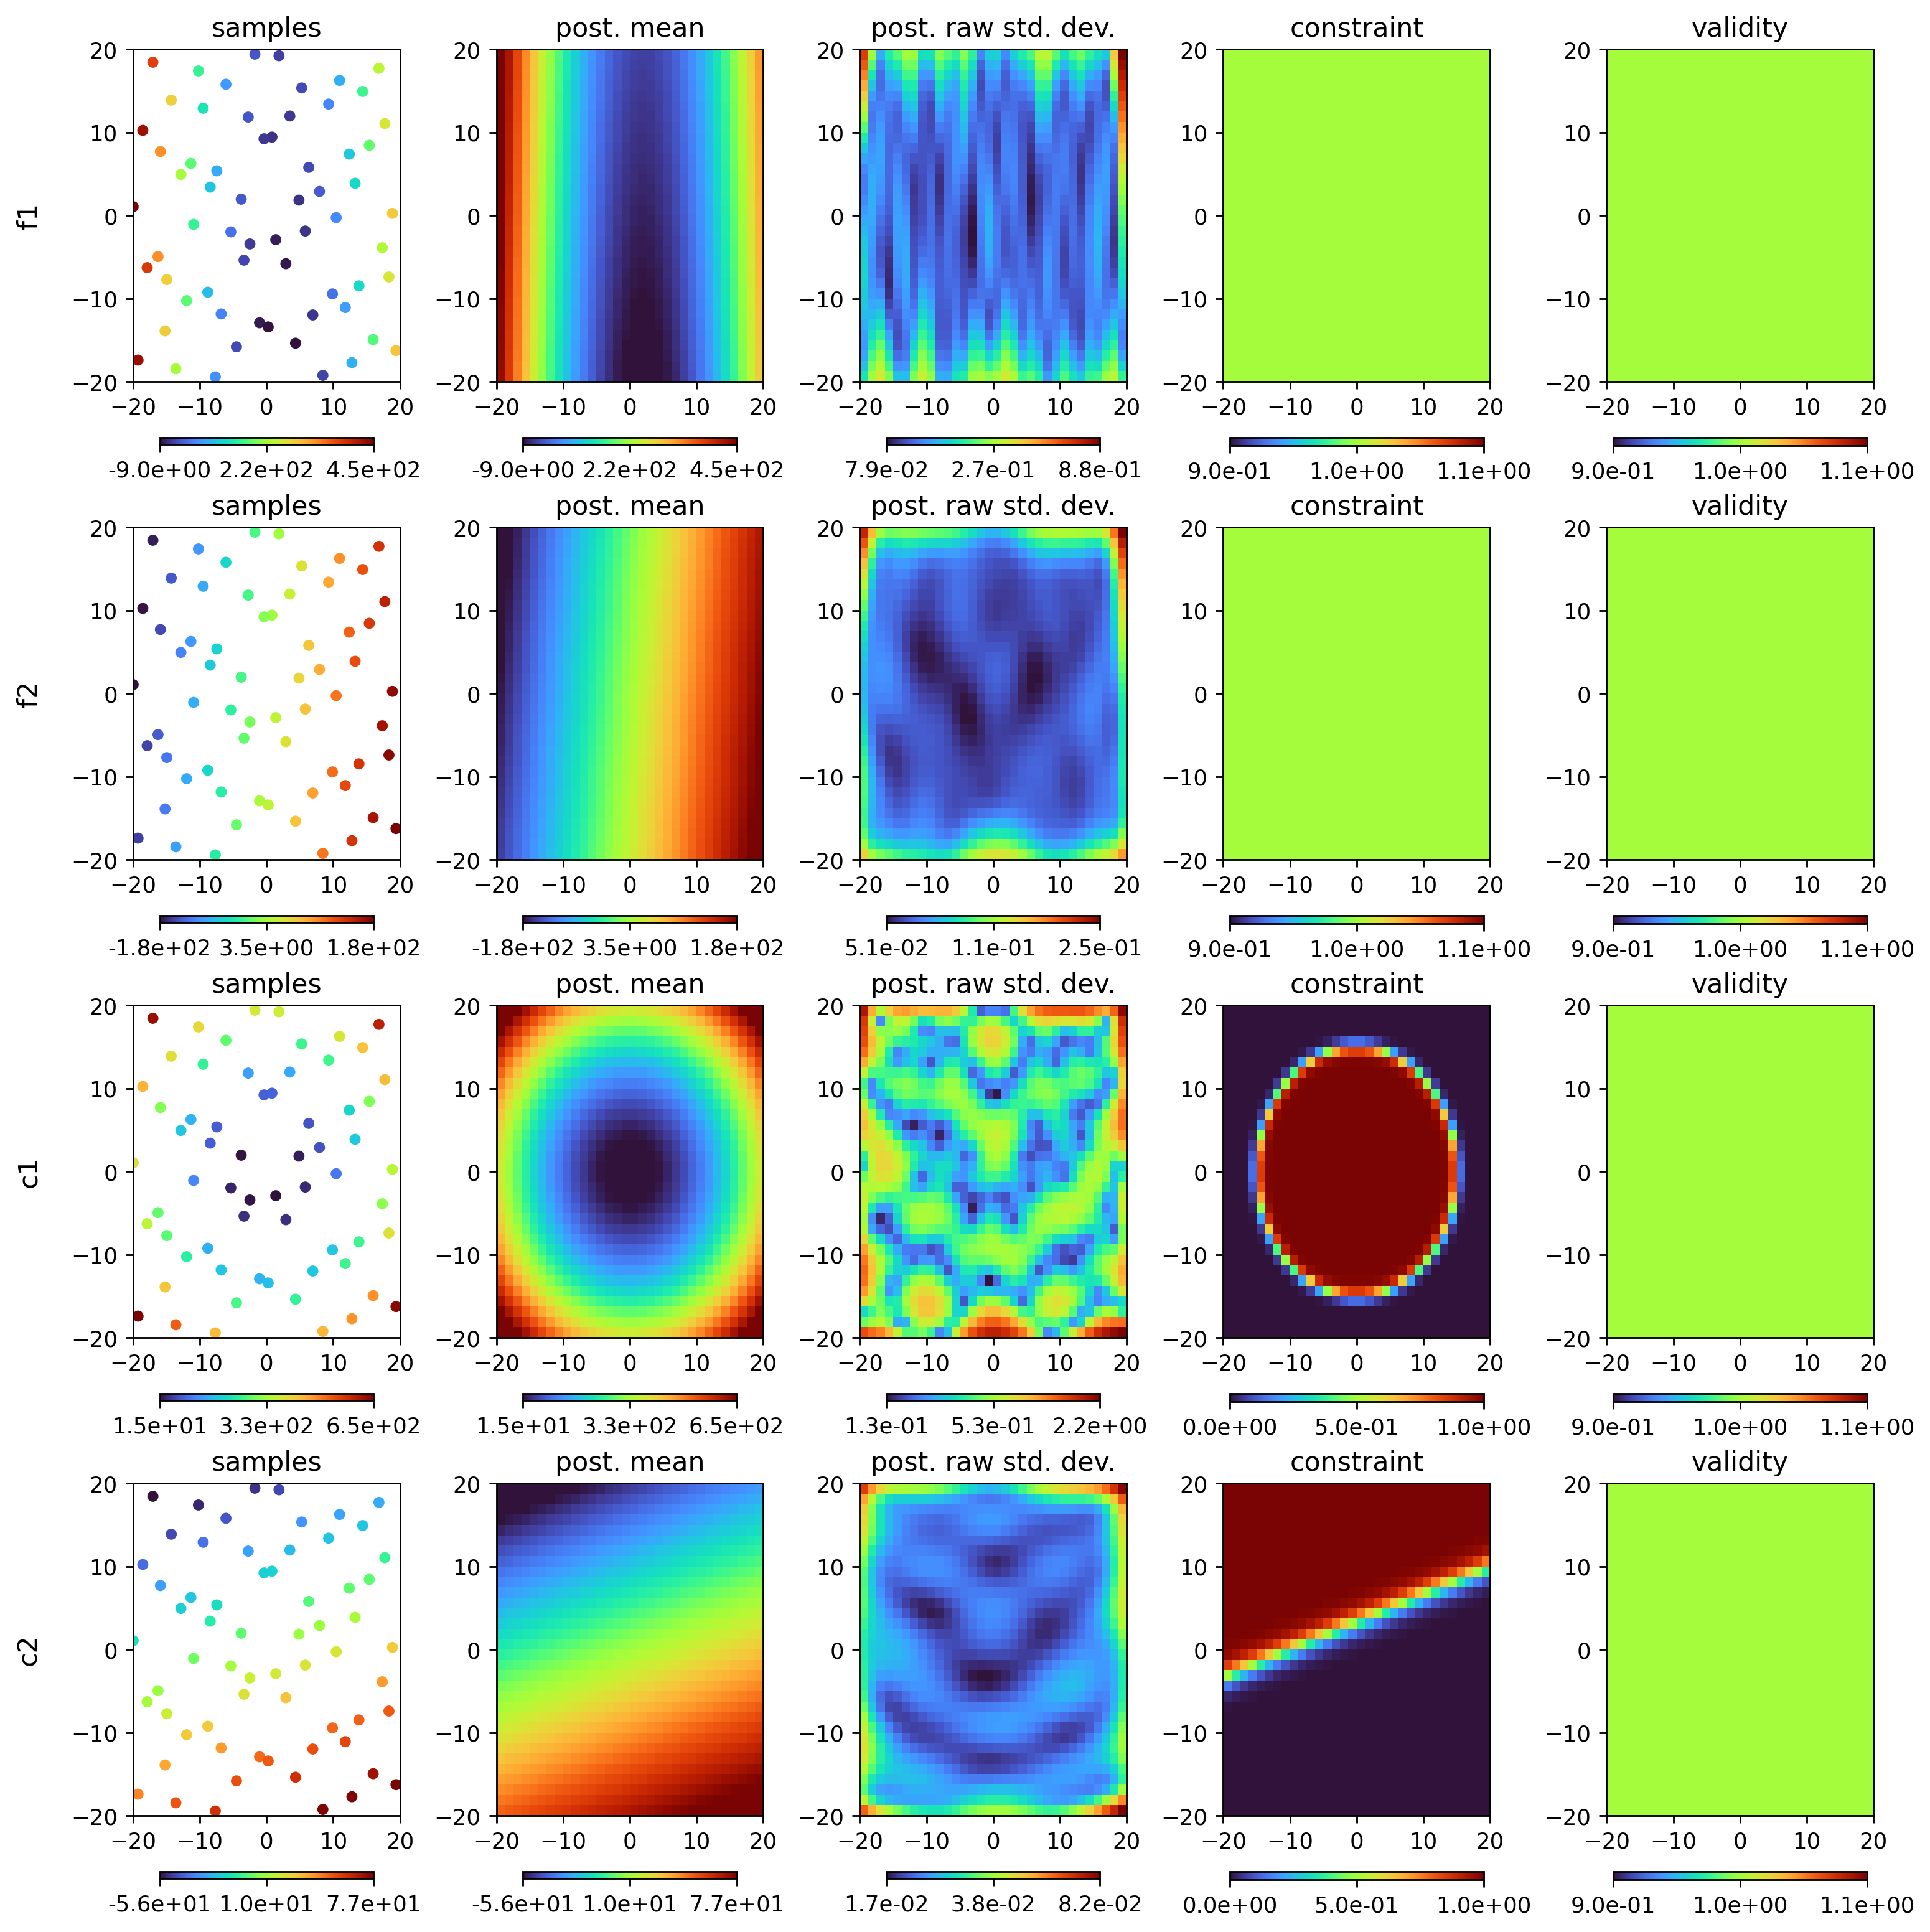

In [3]:
agent.plot_objectives()

We can plot the Pareto front (the set of all Pareto-efficient points), which shows the trade-off between the two fitnesses. The points in blue comprise the Pareto front, while the points in red are either not Pareto efficient or are invalidated by one of the constraints.

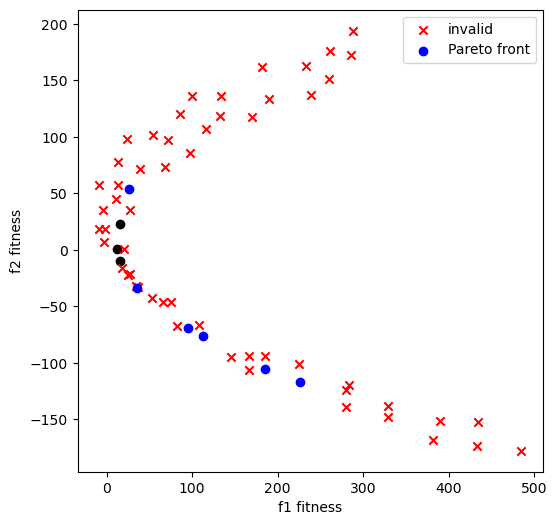

In [4]:
agent.plot_pareto_front()

We can explore the Pareto front by choosing a random point on the Pareto front and computing the expected improvement in the hypervolume of all fitness objectives with respect to that point (called the "reference point"). All this is done automatically with the `qnehvi` acquisition function:

In [5]:
# this is broken now but is fixed in the next PR
# RE(agent.learn("qnehvi", n=4))

In [ ]:
tiled_server.close()